Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


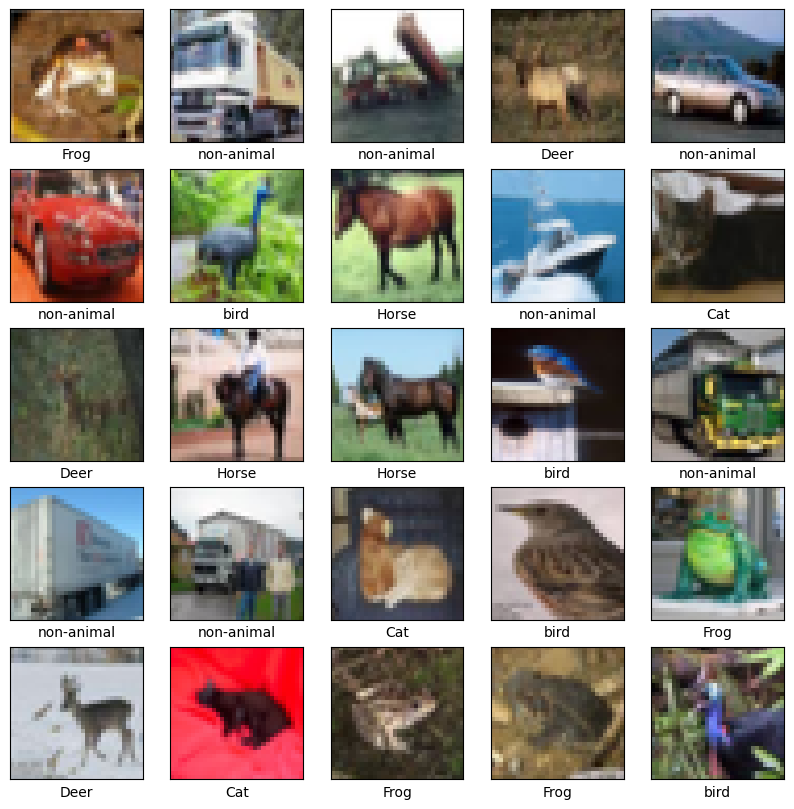

In [72]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import drive
drive.mount('/content/gdrive')

# Load the dataset
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

train_images = train_images[:60000]
train_labels = train_labels[:60000]
test_images =test_images[:60000]
test_labels = test_labels[:60000]

# Normalize pixel values to range between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Define the class names
class_names = ['non-animal', 'non-animal', 'bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'non-animal', 'non-animal']

# Display some sample images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()


In [42]:
# Define the model architecture
model = keras.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(10)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [43]:
# # Define a callback to save the model after each epoch
# checkpoint_callback = keras.callbacks.ModelCheckpoint(
#      '/content/gdrive/MyDrive/model_{epoch:02d}.h5', save_best_only=True)

In [44]:
# # Train the model
model.fit(train_images, train_labels, epochs=15, validation_data=(test_images, test_labels))


Epoch 1/15
1563/1563 [==============================] - 17s 9ms/step - loss: 1.1826 - accuracy: 0.5872 - val_loss: 1.3152 - val_accuracy: 0.5489
Epoch 2/15
1563/1563 [==============================] - 13s 8ms/step - loss: 0.7676 - accuracy: 0.7348 - val_loss: 0.9787 - val_accuracy: 0.6640
Epoch 3/15
1563/1563 [==============================] - 13s 8ms/step - loss: 0.6024 - accuracy: 0.7904 - val_loss: 0.7172 - val_accuracy: 0.7531
Epoch 4/15
1563/1563 [==============================] - 13s 8ms/step - loss: 0.4738 - accuracy: 0.8348 - val_loss: 0.7751 - val_accuracy: 0.7363
Epoch 5/15
1563/1563 [==============================] - 13s 8ms/step - loss: 0.3570 - accuracy: 0.8767 - val_loss: 0.6653 - val_accuracy: 0.7839
Epoch 6/15
1563/1563 [==============================] - 13s 9ms/step - loss: 0.2685 - accuracy: 0.9074 - val_loss: 0.7590 - val_accuracy: 0.7754
Epoch 7/15
1563/1563 [==============================] - 13s 8ms/step - loss: 0.1960 - accuracy: 0.9314 - val_loss: 0.8631 - val_ac

In [45]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)


313/313 [==============================] - 1s 4ms/step - loss: 1.1342 - accuracy: 0.7716
Test accuracy: 0.7716000080108643


1/1 [==============================] - 0s 18ms/step


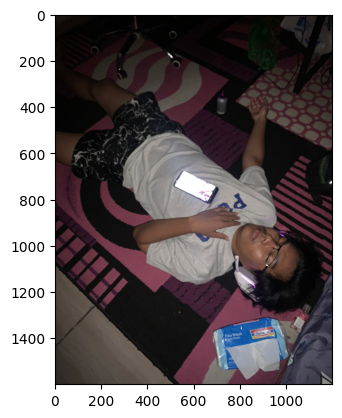

Hewan terdeteksi : Dog
Hewan boleh dititipkan, silahkan datang ke tempat kami!


In [88]:
# Load the image and resize it to 32x32 pixels
image1 = Image.open('/content/gdrive/MyDrive/img/hewan5.jpg')
#image = Image.open('/content/asd.jpg')

image = image1.resize((32, 32))

# Convert the image to a numpy array and normalize its values
image_array = np.array(image) / 255.0

# Reshape the image array to (1, 32, 32, 3)
image_array = image_array.reshape((1, 32, 32, 3))

# Pass the image through the model to get the predicted class probabilities
predictions = model.predict(image_array)

# Get the index of the predicted class with the highest probability
predicted_class = np.argmax(predictions[0])

# Get the corresponding label from the class_names list
label = class_names[predicted_class]

plt.imshow(image1)
plt.show()

print("Hewan terdeteksi :", label)

if (predicted_class == 3 or predicted_class ==5):
  print("Hewan boleh dititipkan, silahkan datang ke tempat kami!")

elif (label == 'non-animal'):
  print("Gambar yang anda kirimkan tidak Valid, SIlahkan Kirim Ulang Gambar!")

else :
  print("Mohon maaf, kami tidak bisa menerima hewan anda!")


